<a href="https://colab.research.google.com/github/tottyprince26/wordcloud/blob/main/word_cloud_with_stack_overflow_tags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROYECTO:
NUBE DE PALABRAS CON ETIQUETAS DE USUARIOS EN STACK OVERFLOW ESPAÑOL
INTEGRANTES:
 
AUSTIN ADRIAN SALGUERO ZAMBRANO
WASHINGTON ROBERT QUIMI FRANCO
IDER IVAN MERCHAN MURILLO


Digite el ID del usuario para mostrar la nube de palabras: 
    7123




Usuario Encontrado: 
 https://es.stackoverflow.com/users/7123/?tab=tags








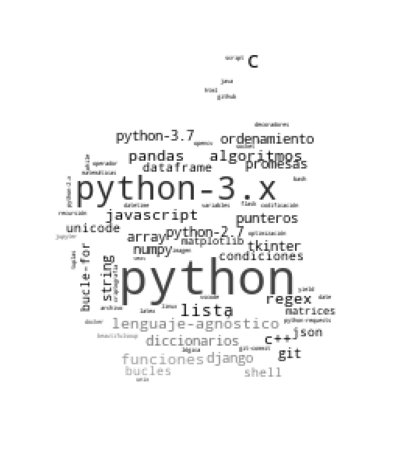

In [15]:
from bs4 import BeautifulSoup
import requests
from PIL import Image
import numpy as np 
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from io import BytesIO
 
 
join = list ()     
npag = list ()    
lbls = list ()    
nmbrs = list ()   
labels = list ()
numbers = list ()
print ("PROYECTO:")
print ("NUBE DE PALABRAS CON ETIQUETAS DE USUARIOS EN STACK OVERFLOW ESPAÑOL")
print ("INTEGRANTES:\n ")
print ("*AUSTIN ADRIAN SALGUERO ZAMBRANO")
print ("*WASHINGTON ROBERT QUIMI FRANCO")
print ("*IDER IVAN MERCHAN MURILLO")

id = input("\n\nDigite el ID del usuario para mostrar la nube de palabras: \n    ") 
print("\n") 
id = id.strip ()
if id.isdigit () != True:  
  print ("\n\nError 404 Not Found: Usuario no encontrado.") 
else: 
  url = 'https://es.stackoverflow.com/users/' + id + "/?tab=tags" 
  page = requests.get (url)   
  if page.status_code == 404:
    print ("\n\nError",page.status_code,"Not Found: Usuario no encontrado.")
  else:
    print ("\n\nUsuario Encontrado: \n", url)
    soup = BeautifulSoup (page.content, "html.parser")

    for f in soup.find_all ('a', class_='m0 badge-tag js-rep-box-next-badge'):
      join.append (f.text)

    for a in soup.find_all ('a', class_='s-pagination--item js-pagination-item'):
      npag.append (a.text)

    if len (npag) == 0:

      for c in soup.find_all ('a', class_='post-tag'):
        lbls.append (c.text)
      if int (len (join)) == 0 and len (lbls) != 0:
        lbls.pop(0)
      for d in soup.find_all ('div', class_='answer-votes'):
        nmbrs.append (d.text)
      cont=0
      for g in nmbrs:
        if int (len (nmbrs[cont])) > 1:
            if nmbrs[cont][-1] == 'k':
              nmbrs[cont] = nmbrs[cont][:-1]
              nmbrs[cont] = nmbrs[cont]+'000'
        cont=cont+1
      counter=0
      for e in nmbrs:
        if int (e) > 0:
          numbers.append (int (e))
          labels.append (lbls[counter])
        counter=counter+1
      lbls.clear ()
      nmbrs.clear ()
    else:
      print ("\n")

      for b in range (int (npag [int (len (npag))-2])):
        num = b+1
        url = 'https://es.stackoverflow.com/users/' + id + '/?tab=tags&sort=votes&page=' + str (num)
        page = requests.get (url)
        soup = BeautifulSoup (page.content, 'html.parser')
        for c in soup.find_all ('a', class_='post-tag'):
          lbls.append (c.text) 
        if int (len (join)) == 0:
          lbls.pop(0)
        for d in soup.find_all ('div', class_='answer-votes'):
          nmbrs.append (d.text)
        cont=0
        for g in nmbrs:
          if int (len (nmbrs[cont])) > 1:
              if nmbrs[cont][-1] == 'k':
                nmbrs[cont] = nmbrs[cont][:-1]
                nmbrs[cont] = nmbrs[cont]+'000'
          cont=cont+1
        counter=0
        for e in nmbrs:
          if int (e) > 0:
            numbers.append (int (e))
            labels.append (lbls[counter])
          counter=counter+1

        lbls.clear ()
        nmbrs.clear ()

    print ('\n')

    if len (labels) == 0:  
      print ("\nEste usuario no tiene etiquetas")    
    else:
      url = "https://image.shutterstock.com/image-photo/image-260nw-593485994.jpg" 
      clr = "white"
      cw = 0
      
      print ("\n")
      dic = dict (zip (tuple (labels), tuple (numbers)))
      response = requests.get (url)
      creation = np.asarray (Image.open (BytesIO (response.content)))  
      wordcloud = WordCloud (background_color = clr, mask=creation, contour_width = cw, max_words=1000).generate_from_frequencies (dic)
      colors = ImageColorGenerator (creation)
      wordcloud.recolor (color_func = colors)
      plt.figure (figsize = (15, 8))
      plt.imshow (wordcloud)
      plt.axis ("off")
      plt.show ()
      plt.close ()